Example code for Softmax
==========================

In [37]:
import numpy as np
import tensorflow as tf

# Load data
xy = np.loadtxt('softmax_train.txt', unpack=True, dtype='float32')
x_data = np.transpose(xy[0:3])
y_data = np.transpose(xy[3:])

# Graph input
X = tf.placeholder("float", [None,3] )
Y = tf.placeholder("float", [None,3] )

# Model weight
W = tf.Variable(tf.zeros([3,3]))

# Construct model
hypothesis = tf.nn.softmax( tf.matmul(X,W))

# Learning rate
learning_rate = 0.001

# Cross entrophy
cost = tf.reduce_mean( -tf.reduce_sum( Y*tf.log(hypothesis), reduction_indices=1 ) )

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

# Launch graph
sess = tf.Session()
sess.run(init)

cost_list = []
step_list = []
for step in range(2001):        
    sess.run(optimizer, feed_dict={X:x_data, Y:y_data})
    if step % 100 == 0:
        cost_in_step = sess.run(cost, feed_dict={X:x_data, Y:y_data})
        print(step, cost_in_step, sess.run(W) )
        step_list.append(step)
        cost_list.append(cost_in_step)


0 1.09774 [[ -8.33333252e-05   4.16666626e-05   4.16666480e-05]
 [  1.66666694e-04   2.91666773e-04  -4.58333408e-04]
 [  1.66666636e-04   4.16666706e-04  -5.83333429e-04]]
100 1.06645 [[-0.00974582  0.00085278  0.00889304]
 [ 0.00999095  0.01240054 -0.02239149]
 [ 0.01006747  0.02499313 -0.0350606 ]]
200 1.05962 [[-0.02051384 -0.00103983  0.02155367]
 [ 0.01406438  0.01097753 -0.02504191]
 [ 0.01431208  0.03574873 -0.05006079]]
300 1.0546 [[-0.03162513 -0.00356464  0.03518977]
 [ 0.01614517  0.00659079 -0.02273595]
 [ 0.01664983  0.04315857 -0.05980836]]
400 1.04985 [[-0.04282598 -0.00625899  0.04908497]
 [ 0.01747187  0.00156368 -0.01903554]
 [ 0.01831204  0.04954104 -0.06785304]]
500 1.04523 [[-0.05402156 -0.00900351  0.06302506]
 [ 0.01851289 -0.00351735 -0.01499552]
 [ 0.01976016  0.05549131 -0.07525142]]
600 1.0407 [[-0.06517859 -0.01176361  0.07694222]
 [ 0.01943521 -0.00848972 -0.01094548]
 [ 0.0211558   0.06118308 -0.0823388 ]]
700 1.03628 [[-0.07628597 -0.01452834  0.09081434

Evaluation of model
=====================

In [38]:
a = sess.run(hypothesis, feed_dict={X:[[1, 11, 7]]} )
print(a, sess.run(tf.arg_max(a,1)) )

b = sess.run(hypothesis, feed_dict={X:[[1, 3, 4]]} )
print(b, sess.run(tf.arg_max(b,1)) )

c = sess.run(hypothesis, feed_dict={X:[[1, 1, 0]]} )
print(c, sess.run(tf.arg_max(c,1)) )



[[ 0.46272627  0.35483006  0.18244371]] [0]
[[ 0.33820099  0.42101386  0.24078514]] [1]
[[ 0.27002314  0.29085544  0.4391214 ]] [2]


Chart the cost reduction in every step.
==============


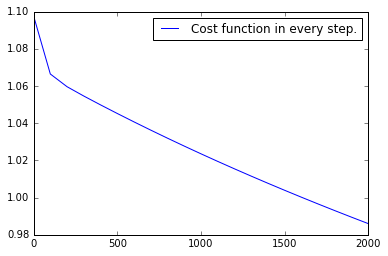

In [40]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot(step_list, cost_list, label='Cost function in every step.')
plt.legend()
plt.show()


In [42]:
# Tip: print out the tensor.
print( sess.run(W) )

[[-0.21581143 -0.05025396  0.26606542]
 [ 0.02894915 -0.06228962  0.03334056]
 [ 0.04230019  0.12409624 -0.16639642]]
